In [1]:
import pandas as pd

eicu = pd.read_csv("../data/one_hot_age_gender_eicu_data.csv")
eicu.head()

,patientunitstayid,hospitalid,Death,unitdischargeoffset,ventilation,sepsis,Gender,< 30,30 - 39,40 - 49,...,traMADol,traMADol 50 MG TAB,traZODone,vancomycin,vancomycin hcl 1000 mg iv solr,vancomycin in D5W (VANCOCIN) ivpb 1 g,warfarin,warfarin sodium (COUMADIN) tab 5 mg,zolpiDEM 5 MG TAB,zolpidem
0,141168.0,59.0,1.0,3596.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141194.0,73.0,0.0,4813.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,141233.0,73.0,0.0,15685.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,141244.0,73.0,0.0,3835.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,141265.0,63.0,0.0,6068.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
sorted_hospitals_df = eicu.groupby(['hospitalid']) \
    .size() \
    .reset_index(name='counts') \
    .sort_values(['counts'], ascending=False)

sorted_hospitals = sorted_hospitals_df['hospitalid'].tolist()
print(sorted_hospitals_df)

     hospitalid  counts
11         73.0    3006
104       264.0    2686
182       420.0    2646
88        243.0    1976
198       443.0    1951
..          ...     ...
17         90.0       2
16         86.0       2
23         96.0       2
152       385.0       2
44        151.0       1

[206 rows x 2 columns]


In [2]:
eicu.hospitalid.unique()

array([ 59.,  73.,  63.,  66.,  71.,  68.,  60.,  67.,  56.,  69.,  61.,
        58.,  79.,  92.,  83., 108.,  95.,  85.,  93.,  94., 102.,  96.,
        84.,  91.,  86.,  90., 110., 122., 125., 133., 131., 112., 123.,
       120., 138., 115., 135., 144., 143., 142., 141., 140., 175., 171.,
       157., 176., 167., 154., 148., 152., 165., 146., 155., 179., 158.,
       174., 164., 151., 184., 183., 182., 181., 180., 188., 196., 198.,
       197., 194., 195., 206., 199., 202., 201., 203., 200., 204., 205.,
       208., 209., 207., 210., 220., 224., 217., 215., 212., 226., 227.,
       244., 245., 243., 246., 252., 253., 249., 248., 251., 250., 266.,
       256., 264., 259., 267., 254., 262., 258., 263., 265., 283., 269.,
       279., 281., 280., 282., 268., 272., 271., 275., 277., 273., 307.,
       300., 310., 318., 312., 301., 303., 323., 338., 331., 337., 345.,
       328., 336., 342., 350., 352., 351., 365., 360., 358., 353., 355.,
       357., 364., 356., 363., 361., 397., 400., 39

In [3]:
len(eicu.hospitalid.unique())

206

In [22]:
print(eicu[eicu['hospitalid'] == 73].shape)

(3006, 1426)


In [31]:
import numpy as np

hospital_ids = eicu.hospitalid.unique()
icu_data = eicu.to_numpy()

# Select 20 hospitals with most patients
hospital_data = [icu_data[icu_data[:, 1] == hospital_id] for hospital_id in hospital_ids]
                                    
sorted_hospital_data = []
sorted_hospital_ids = []
count = 0
for data in hospital_data:

    if len(data) < 500:
        continue
    
    if np.sum(1 * (data[:, 2] == 1)) < 50:
        continue
    
    sorted_hospital_data.append(data)
    sorted_hospital_ids.append(data[0, 1])

sorted_hospital_data.sort(key=len)

3006
0


In [24]:
print(sorted_hospital_data)

[array([[2.669317e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.669700e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.669955e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [2.900353e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.900354e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.901406e+06, 3.900000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]]), array([[1.314586e+06, 2.270000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.314775e+06, 2.270000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.314922e+06, 2.270000e+02, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [1.366558e+0

In [23]:
import numpy as np

death_patients_count, alive_patients_count = [], []

for data in sorted_hospital_data:

    alive_patients_count.append(np.sum(1 * (data[:, 2] == 0)))
    death_patients_count.append(np.sum(1 * (data[:, 2] == 1)))

[[2.669317e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.669700e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.669955e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [2.900353e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.900354e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.901406e+06 3.900000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]
[[1.314586e+06 2.270000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.314775e+06 2.270000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.314922e+06 2.270000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 ...
 [1.366558e+06 2.270000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.366608e+06 2.270000e+02 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.366612e+06 2.270000e+02 0.00

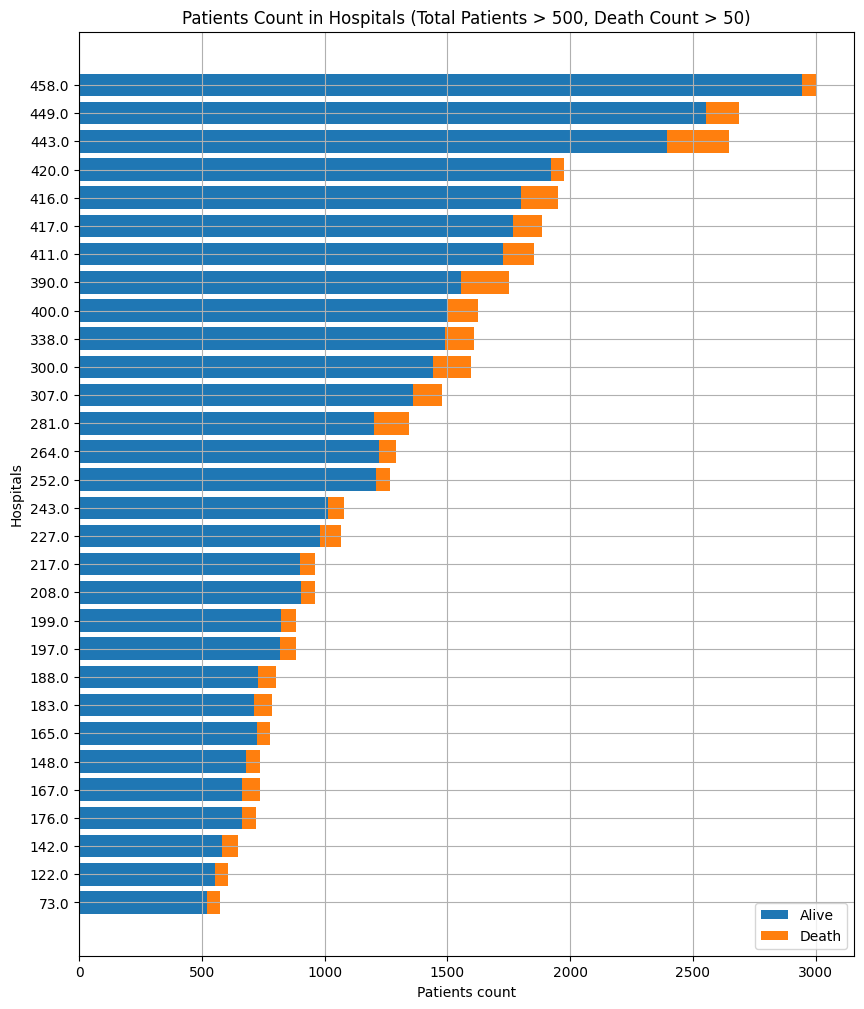

In [18]:
import matplotlib.pyplot as plt

clients = [str(hospitalid) for hospitalid in sorted_hospital_ids]

plt.figure(figsize=(10, 12))
plt.title("Patients Count in Hospitals (Total Patients > 500, Death Count > 50)")
plt.barh(clients, alive_patients_count, label='Alive')
plt.barh(clients, death_patients_count, left=alive_patients_count, label='Death')
plt.legend()
plt.grid(True)
plt.xlabel("Patients count")
plt.ylabel("Hospitals")
plt.show()